In [1]:
import cv2
import numpy as np
import pandas as pd

In [2]:
# 신경망 모델 구조 파일
cfg_file = './opencv_data/yolo/yolov3.cfg'
# 가중치 파일
weights_file = './opencv_data/yolo/yolov3.weights'
# 인식 가능한 사물의 이름
class_file = './opencv_data/yolo/coco.names'

In [3]:
# yolo 모델을 복원한다.
net = cv2.dnn.readNet(weights_file, cfg_file)
net

< cv2.dnn.Net 00000233A46413B0>

In [4]:
# 물체 종류를 리스트로 추출한다.
with open(class_file, 'rt') as fp:
    classes = fp.readlines()
    classes = [line.strip() for line in classes]
    
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
# 각 물체를 의미하는 색상은 랜덤하게 생성한다.
colors = np.random.uniform(0, 255, size=(len(classes), 3))
colors

array([[ 48.49545289,  89.48554998, 169.42137568],
       [ 63.03612312, 245.15053851, 177.54396522],
       [ 53.39437395, 206.55283047, 197.2908954 ],
       [165.08507719, 236.85202844,  63.9438724 ],
       [247.49163023,  68.48351121,  75.34533407],
       [ 10.79953236,  96.45098958,  66.85334472],
       [ 60.88172078, 114.9823674 , 217.98769945],
       [209.71434851, 149.4654405 , 195.23515897],
       [243.97508464, 147.31622532, 128.16496904],
       [240.70804049, 174.01731098,  50.24677044],
       [  7.76404707, 145.4933083 , 101.40944998],
       [150.90625839, 175.16544304, 130.29949652],
       [ 13.92872705, 118.88425977,  24.13454884],
       [228.86784169, 123.11969127,  42.98379008],
       [ 44.78437794, 254.11782199, 251.5793165 ],
       [ 95.41272073, 177.06457121,  31.17046483],
       [170.54407222, 233.93424794,  94.01097721],
       [102.8381779 ,  62.78400871, 228.83850994],
       [107.73177172, 162.88802123, 205.33933026],
       [162.14623321, 132.98909

In [6]:
# 사용할 이미지를 불러온다.
img = cv2.imread('./opencv_data/image/yolo_01.jpg')

In [7]:
# 이미지의 세로, 가로, 채널
height, width, channel = img.shape

In [8]:
# 이미지의 크기를 조정한다.
# 16*16 부터 16 배수로 설정해주면 된다.(강제)
a1 = cv2.resize(img, (416, 416))

In [9]:
# 2진 데이터로 변환한다.
# 0.00392 - 임계값. 이 값보다 크면 1, 작으면 0으로 변환한다.
# 이 값은 완전 흰색이 1, 완전 검정색을 0으로 취급한다.
# 여기서 설정하는 임계값은 yolo에서 추천하는 값
blob = cv2.dnn.blobFromImage(a1, 0.00392, (416, 416), (0, 0, 0))

In [10]:
# 모델의 정보를 확인한다.
# 은닉층들의 이름을 가져온다.
layer_names = net.getLayerNames()
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [11]:
# 출력층의 이름
output_layers = net.getUnconnectedOutLayersNames()
output_layers

('yolo_82', 'yolo_94', 'yolo_106')

In [12]:
# 이미지 데이터를 모델에 셋팅해준다.
net.setInput(blob)

In [13]:
# 물체를 검출한다.
outs = net.forward(output_layers)
outs

(array([[0.03885192, 0.05044644, 0.35945648, ..., 0.        , 0.        ,
         0.        ],
        [0.04448604, 0.03596887, 0.27568182, ..., 0.        , 0.        ,
         0.        ],
        [0.05033819, 0.03731377, 0.7720317 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96522146, 0.9480876 , 0.40103167, ..., 0.        , 0.        ,
         0.        ],
        [0.9650735 , 0.96141326, 0.28590482, ..., 0.        , 0.        ,
         0.        ],
        [0.96688354, 0.9601263 , 0.8609129 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01812692, 0.02535   , 0.05008673, ..., 0.        , 0.        ,
         0.        ],
        [0.01727686, 0.01927787, 0.39123425, ..., 0.        , 0.        ,
         0.        ],
        [0.02354368, 0.01680703, 0.07943393, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97256684, 0.9756397 , 0.0461183 , ..., 0.        , 0.        ,
         0.        

In [14]:
a1 = outs[0][0]

print(f'물체의 중심점 x : {a1[0]}')
print(f'물체의 중심점 y : {a1[1]}')
print(f'물체의 가로 길이 : {a1[2]}')
print(f'물체의 세로 길이 : {a1[3]}')

# 각 사물의 확률 부분만 가져온다.
a2 = a1[5:]
# 확률이 가장 높은 위치 값을 가져온다.
a3 = np.argmax(a2)
# 확률 값을 가져온다.
a4 = a2[a3]
print(f'확률 : {a4}')
print(f'사물이름 : {classes[a3]}')

물체의 중심점 x : 0.03885192051529884
물체의 중심점 y : 0.05044643580913544
물체의 가로 길이 : 0.35945647954940796
물체의 세로 길이 : 0.1388537734746933
확률 : 0.0
사물이름 : person


In [15]:
# 예측된 결과를 담을 리스트
class_id_list = []
# 예측 정확도
confidence_list = []
# 인지된 사물의 영역
box_list = []

# 확률의 임계값
# 이 확률 이상인 것만 결과에 담는다.
confidence_limit = 0.5

# 출력층의 수 만큼 반복한다.
for out in outs :
    # 현재의 출력층이 검출한 물체의 수 만큼 반복한다.
    for detection in out :
        # 원핫 인코딩되어 있는 확률 값만 가져온다.
        score_list = detection[5:]
        # 확률이 가장 높은 물체 값을 가져온다.
        class_id = np.argmax(score_list)
        # 확률을 가져온다.
        confidence = score_list[class_id]
        
        # print(classes[class_id], score_list[class_id])
        
        # 확률이 확률 임계값 이상인 것만 처리한다.
        if confidence >= confidence_limit :
            # 물체의 좌표를 계산한다.
            # 예측 결과에서 앞의 4개는
            # 중심점 x 비율, 중심점 y 비율, 가로 비율, 세로 비율이다.
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)

            # 가로길이
            w = int(detection[2] * width)
            # 세로길이
            h = int(detection[3] * height)
            # 좌측 상단 x
            x = int(center_x - w / 2 )
            # 좌측 상단 y
            y = int(center_y - h / 2)

            # 담는다.
            box_list.append([x, y, w, h])
            confidence_list.append(float(confidence))
            class_id_list.append(class_id)
            
# IoU : 두 면적이 중첩되는 영역의 넓이를 두 면적의 합친 총 면적으로 나눈 값
# 두 면적이 얼마나 중첩되어 있는지 평가할 수 있는 지표가 된다.
# 0~1 사이가 나오며 값이 클수록 중첩된 부분이 많다고 평가할 수 있다.

# NMS : IoU 방식으로 면적을 평가하고 중첩이 많이 됬다고 판단되는 영역을 제거하는 방식.
# IoU 방식으로 평가하여 중첩잉 많이 됬다고 판단되는 영역을 모두 아우를 수 있는 영역을 만들어낸다.
# 0.4 : 확인하지 않고 버릴 영역의 확률값

# 결과는 인식한 사물의 index 번호
indexes = cv2.dnn.NMSBoxes(box_list, confidence_list, confidence_limit, 0.4)
indexes

array([15, 20,  0, 28,  8, 29, 23, 24, 21])

In [16]:
# 결과를 토대로 그린다.
# 검출된 물체의 수 만큼 반복한다.
for i in range(len(box_list)):
    # NMS를 통해 추출한 영역만 표시한다.
    if i in indexes:

        # 좌표값을 추출한다.
        x, y, w, h = box_list[i]
        # 이름
        label = str(classes[class_id_list[i]])
        # 색상
        color = colors[class_id_list[i]]

        # 네모를 그린다.
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        # 이름을 표시한다.
        cv2.putText(img, label, (x, y-30), cv2.FONT_HERSHEY_PLAIN, 3, color, 3)
    
cv2.imshow('Object Detection', img)
cv2.waitKey()
cv2.destroyAllWindows()

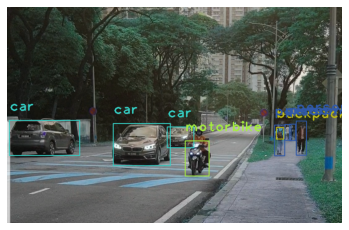

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img, 'gray')
plt.axis('off')
plt.show()